99.99% Actual loss won't exceed: -8463.73
99.00% Actual loss won't exceed: -3407.66
95.00% Actual loss won't exceed: -1926.67
Losses expected to exceed -1926.67 80.0 out of 1600 days


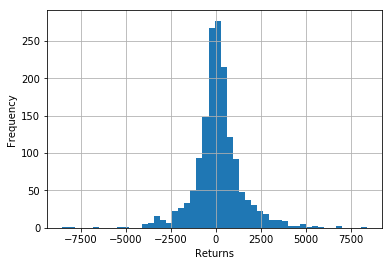

In [9]:
#Data manipulation
import numpy as np
import pandas as pd

#Plotting
import matplotlib.pyplot as plt

#Data fetching
import pandas_datareader.data as data
import datetime

#Print tabular data
#Calculate daily returns
tickers = ["BTC-USD", "ETH-USD", "DOGE-USD"]
exposures = [10000, 10000, 10000]

#Timeframe
start = "2015-08-07"
end = datetime.date.today()


df = data.DataReader(tickers, data_source="yahoo", start=start, end=end)
percentage = df.pct_change()
percentage = percentage["Close"]

value_ptf = percentage * exposures

value_ptf.dropna()

value_ptf['Value of Portfolio'] = value_ptf.sum(axis=1)
value_ptf['Value of Portfolio']

ptf_percentage = value_ptf['Value of Portfolio']
ptf_percentage = ptf_percentage.sort_values(axis=0, ascending=True)

VaR =  np.percentile(ptf_percentage, .01)
VaR1 =  np.percentile(ptf_percentage, 1)
VaR2 =  np.percentile(ptf_percentage, 5)

print ("99.99% Actual loss won't exceed: " + str(round(VaR, 2)))
print ("99.00% Actual loss won't exceed: " + str(round(VaR1, 2)))
print ("95.00% Actual loss won't exceed: " + str(round(VaR2, 2))) 
print ("Losses expected to exceed " + "{0:.2f}".format(VaR2) + " " + str(.05*len(ptf_percentage)) + " out of " + str(len(ptf_percentage)) + " days")
percentage = percentage[1:]

#plot histogram
mean = np.mean(ptf_percentage)
std_dev = np.std(ptf_percentage)
ptf_percentage.hist(bins=50)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()
